In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
#import plotly.express as px
from datetime import datetime
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer; imputer = SimpleImputer(strategy="median")
from sklearn.ensemble import RandomForestRegressor
import datetime
import pickle

In [2]:
test = pd.read_csv('C:\\Users\\miron\\Desktop\\РайфайзенБанк\\test.csv')
test.columns = test.columns.str.lower()
test.head(2)

,city,floor,id,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,...,reform_mean_year_building_1000,reform_mean_year_building_500,region,lat,lng,total_square,street,date,realty_type,price_type
0,Курск,1.0,COL_289284,7,55,85,117,0,0,0,...,1966.471591,1966.740260,Курская область,51.709255,36.147908,156.148996,S6983,2020-09-06,100,1
1,Сургут,1.0,COL_289305,8,70,112,140,0,0,0,...,1988.259259,1989.068182,Ханты-Мансийский АО,61.233240,73.462509,190.737943,S29120,2020-09-06,110,1


In [3]:
train = pd.read_csv('C:\\Users\\miron\\Desktop\\РайфайзенБанк\\train.csv')
train.columns = train.columns.str.lower()
train.head()

C:\Users\miron\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,...,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type
0,Пермь,NaN,COL_0,57.998207,56.292797,4,19,35,52,0,...,5.762963,5.530612,1964.118519,1960.959184,Пермский край,32.0,S27289,2020-01-05,10,0
1,Шатура,NaN,COL_1,55.574284,39.543835,3,24,37,59,0,...,2.894366,3.527778,1952.321678,1957.222222,Московская область,280.0,S17052,2020-01-05,10,0
2,Ярославль,NaN,COL_2,57.619140,39.850525,1,30,67,128,0,...,6.141414,7.222222,1968.150000,1973.370370,Ярославская область,297.4,S16913,2020-01-05,110,0
3,Новокузнецк,NaN,COL_3,53.897083,87.108604,0,0,5,21,0,...,8.581081,9.000000,1992.716216,2014.000000,Кемеровская область,190.0,S10148,2020-01-05,110,0
4,Москва,NaN,COL_4,55.802590,37.487110,1,23,64,153,0,...,7.263889,5.684211,1963.229167,1960.500000,Москва,60.2,S1338,2020-01-05,10,0


# Количество null-ов

In [4]:
train_null_index = train.isnull().sum().reset_index()
train_null_index.columns = ['atribut','isnull_count']
train_null_index[train_null_index['isnull_count'] > 0]

,atribut,isnull_count
1,floor,176237
19,osm_city_nearest_population,55
65,reform_house_population_1000,14596
66,reform_house_population_500,27234
67,reform_mean_floor_count_1000,16708
68,reform_mean_floor_count_500,30168
69,reform_mean_year_building_1000,16239
70,reform_mean_year_building_500,29637
73,street,1606


In [5]:
test_null_index = test.isnull().sum().reset_index()
test_null_index.columns = ['atribut','isnull_count']
test_null_index[test_null_index['isnull_count'] > 0]

,atribut,isnull_count
1,floor,1301
62,reform_house_population_1000,35
63,reform_house_population_500,48
64,reform_mean_floor_count_1000,35
65,reform_mean_floor_count_500,48
66,reform_mean_year_building_1000,35
67,reform_mean_year_building_500,48
72,street,6


## Процент пропусков в тесте

In [6]:
null_percent_test = (test.isnull().sum() / test.isnull().count()).sort_values(ascending=False) * 100
null_percent_test = null_percent_test[null_percent_test > 0]
null_percent_test

floor                             43.745797
reform_house_population_500        1.613988
reform_mean_year_building_500      1.613988
reform_mean_floor_count_500        1.613988
reform_mean_year_building_1000     1.176866
reform_mean_floor_count_1000       1.176866
reform_house_population_1000       1.176866
street                             0.201748
dtype: float64

## Процент пропусков в тесте

In [7]:
null_percent_train = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False) * 100
null_percent_train = null_percent_train[null_percent_train > 0]
null_percent_train

floor                             62.988577
reform_mean_floor_count_500       10.782295
reform_mean_year_building_500     10.592512
reform_house_population_500        9.733659
reform_mean_floor_count_1000       5.971579
reform_mean_year_building_1000     5.803954
reform_house_population_1000       5.216732
street                             0.573998
osm_city_nearest_population        0.019657
dtype: float64

## Describe() для теста и трэйна

In [8]:
train.describe().transpose().iloc[:,1:]

,mean,std,min,25%,50%,75%,max
lat,54.364078,4.245713,42.651897,53.226600,55.679090,56.306976,69.50074
lng,47.763540,17.044625,19.892178,37.582988,39.702435,55.957523,151.77700
osm_amenity_points_in_0.001,2.709084,4.202451,0.000000,0.000000,1.000000,4.000000,46.00000
osm_amenity_points_in_0.005,40.605146,53.293388,0.000000,7.000000,22.000000,51.000000,468.00000
osm_amenity_points_in_0.0075,81.596171,105.193169,0.000000,16.000000,46.000000,101.000000,851.00000
...,...,...,...,...,...,...,...
reform_mean_year_building_1000,1967.532599,45.807699,1.000000,1960.070000,1970.890411,1983.701754,2019.00000
reform_mean_year_building_500,1967.988580,54.110015,1.000000,1959.890097,1971.647059,1986.950000,2020.00000
total_square,507.833604,1704.251771,5.100000,65.900000,128.737034,336.000000,40000.00000
realty_type,54.974088,47.856417,10.000000,10.000000,10.000000,110.000000,110.00000


In [9]:
test.describe().transpose().iloc[:,1:]

,mean,std,min,25%,50%,75%,max
osm_amenity_points_in_0.001,3.475790,4.942990,0.000000,0.000000,2.000000,4.000000,47.000000
osm_amenity_points_in_0.005,56.622058,79.150088,0.000000,15.000000,32.000000,60.000000,446.000000
osm_amenity_points_in_0.0075,116.339946,164.979277,0.000000,32.000000,66.000000,119.000000,855.000000
osm_amenity_points_in_0.01,188.180901,268.308805,0.000000,55.000000,104.000000,193.000000,1375.000000
osm_building_points_in_0.001,0.028917,0.215067,0.000000,0.000000,0.000000,0.000000,4.000000
...,...,...,...,...,...,...,...
lat,55.466594,3.479215,42.814200,53.217885,55.978571,56.837790,69.356995
lng,63.153755,26.592173,20.142404,36.581435,60.546986,87.202715,132.872232
total_square,406.735382,1063.619932,7.279623,97.288057,181.066253,368.433009,31124.725426
realty_type,57.367182,47.218940,10.000000,10.000000,100.000000,100.000000,110.000000


## Корреляция 

In [10]:
corrmat = train.corr()
corrmat.per_square_meter_price.sort_values(ascending=False).iloc[1:15]

osm_city_nearest_population        0.551891
osm_catering_points_in_0.005       0.489370
osm_amenity_points_in_0.005        0.483741
osm_amenity_points_in_0.01         0.476595
osm_amenity_points_in_0.0075       0.475630
osm_catering_points_in_0.0075      0.471668
osm_catering_points_in_0.01        0.463029
osm_leisure_points_in_0.01         0.462191
osm_healthcare_points_in_0.01      0.460384
osm_shops_points_in_0.01           0.440750
osm_healthcare_points_in_0.0075    0.440013
osm_amenity_points_in_0.001        0.437389
osm_shops_points_in_0.005          0.433042
osm_shops_points_in_0.0075         0.433007
Name: per_square_meter_price, dtype: float64

In [11]:
corrmat.per_square_meter_price.sort_values(ascending=False).tail(3)

osm_city_closest_dist     -0.135308
lng                       -0.222177
osm_subway_closest_dist   -0.268879
Name: per_square_meter_price, dtype: float64

## Функция метрики

In [12]:
def metrika(y_true, y_pred):
    w = 1.1
    dev = (y_true - y_pred) / y_true
    if dev < -0.6:
        return w * 9
    if -0.6 <= dev < -0.15:
        return w * (1 + dev/0.15) ** 2
    if -0.15 <= dev < 0.15:
        return 0
    if 0.15 <= dev < 0.6:
        return (dev/0.15 - 1) ** 2
    if dev >= 0.6:
        return 9

## Разбиениие закодированного realty_type на 3 атрибута

In [13]:
def realty_type(row, realty):
    realty_type = row['realty_type']
    if (realty_type == realty):
        return 1
    else:
        return 0
    

## Функции обработки этажа

In [14]:
def obrab1(x):
    if isinstance(x, str):
        var = {"Подвал": -1, "Цоколь": -1, "подвал": -1, "цоколь": -1, "Мансарда": -2, "мансарда": -2}
        for key, value in var.items():
            if key in x:
                return var[key]
    return x

# Хочу проверить здесь, если вместо np.nan для теста по "-" и "," 
# поставить флаг, который потом перевести в бинарную переменную
def obrab2(x):
    if isinstance(x, str):
        resstr = ""
        prev = True
        for i in x:
            if i == ',' or i == '-':
                return np.nan
            if (prev and i == '.') or i.isdigit():
                resstr += i
                prev = True
            else:
                prev = True if i == ' ' else False
        return resstr
    else:
        return x
    
def obrab3(x):
    if isinstance(x, str):
        if x == "":
            return np.nan
    return x

In [15]:
train['floor'] = train['floor'].map(obrab1)
train['floor'] = train['floor'].map(obrab2)
train['floor'] = train['floor'].map(obrab3)

#### Переводим floor в int

In [16]:
train['floor'] = train['floor'].astype('float')
train['floor'] = train['floor'].fillna(train['floor'].median())
train['floor'] = train['floor'].astype('int')

### Оставляем от даты только месяц

In [17]:
train['date'] = pd.to_datetime(train['date'])
train['date'] = train['date'].map(lambda x: x.month)

In [18]:
train

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,...,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type
0,Пермь,1,COL_0,57.998207,56.292797,4,19,35,52,0,...,5.762963,5.530612,1964.118519,1960.959184,Пермский край,32.000000,S27289,1,10,0
1,Шатура,1,COL_1,55.574284,39.543835,3,24,37,59,0,...,2.894366,3.527778,1952.321678,1957.222222,Московская область,280.000000,S17052,1,10,0
2,Ярославль,1,COL_2,57.619140,39.850525,1,30,67,128,0,...,6.141414,7.222222,1968.150000,1973.370370,Ярославская область,297.400000,S16913,1,110,0
3,Новокузнецк,1,COL_3,53.897083,87.108604,0,0,5,21,0,...,8.581081,9.000000,1992.716216,2014.000000,Кемеровская область,190.000000,S10148,1,110,0
4,Москва,1,COL_4,55.802590,37.487110,1,23,64,153,0,...,7.263889,5.684211,1963.229167,1960.500000,Москва,60.200000,S1338,1,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279787,Томск,1,COL_280111,56.459183,84.979334,2,33,111,222,0,...,5.714286,5.882353,1972.260870,1973.460000,Томская область,358.320073,S11114,8,10,1
279788,Санкт-Петербург,1,COL_280479,59.936954,30.356383,10,274,718,1340,0,...,4.719388,4.706667,1876.994898,1873.186667,Санкт-Петербург,119.637556,S28440,8,110,1
279789,Калининград,3,COL_280518,54.729233,20.514968,0,12,34,84,0,...,3.950413,4.885714,1964.258333,1970.571429,Калининградская область,312.789725,S6671,8,10,1
279790,Кемерово,1,COL_280529,55.360680,86.081460,5,57,100,134,0,...,4.691489,4.125000,1957.425532,1954.625000,Кемеровская область,89.201305,S17667,8,110,1


In [19]:
def chistka(list1, list2): 
    for i in list2: 
        if i in list1: 
            list1.remove(i)
    return list1

In [20]:
def openf(): 
    with open('list_1.ob', 'wb') as fp: 
        pickle.dump(attr_adder.d, fp) 

def loadf(cls): 
    t = [] 
    with open (cls + '.ob', 'rb') as fp: 
        t = pickle.load(fp) 
    return t 


t = loadf('street')
tt = loadf('city')


In [21]:
class CombinedAttributesEditor(BaseEstimator, TransformerMixin):
    def __init__(self):# no *args or **kargs
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, df_train, y = None):
        df_train = df_train.fillna(value={'street': 'missing'})

#         replace_list = df_train.groupby(['city', 'street'], as_index=False)['per_square_meter_price']\
#         .mean().sort_values(by=['per_square_meter_price'], ignore_index=True)

#         replace_list['asc_ind'] = replace_list.index

        city_list = df_train.groupby(['city'], as_index=False)['per_square_meter_price']\
        .mean().sort_values(by=['per_square_meter_price'], ignore_index=True)

        city_list['city_id'] = city_list.index

        street_list = df_train.groupby(['street'], as_index=False)['per_square_meter_price']\
        .mean().sort_values(by=['per_square_meter_price'], ignore_index=True)

        street_list['street_id'] = street_list.index

        df_train = df_train.merge(city_list.drop(['per_square_meter_price'], axis=1),
        left_on = ['city'], right_on = ['city']).merge(street_list.drop(['per_square_meter_price'], axis=1),
        left_on = ['street'], right_on = ['street'])
        
        df_train['floor'] = df_train['floor'].map(obrab1)
        df_train['floor'] = df_train['floor'].map(obrab2)
        df_train['floor'] = df_train['floor'].map(obrab3)
        
        df_train['floor'] = df_train['floor'].astype('float')
        df_train['floor'] = df_train['floor'].fillna(df_train['floor'].median())
        df_train['floor'] = df_train['floor'].astype('int')
        
        df_train['date'] = pd.to_datetime(df_train['date'])
        df_train['date'] = df_train['date'].map(lambda x: x.month)
        
        df_train['realty_type_10'] = df_train.apply(realty_type, axis = 1, realty = 10)
        df_train['realty_type_100'] = df_train.apply(realty_type, axis = 1, realty = 100)
        df_train['realty_type_110'] = df_train.apply(realty_type, axis = 1, realty = 110)
        
        #import datetime 

        df_train['reform_mean_year_building_500'] = datetime.datetime.now().year - df_train['reform_mean_year_building_500'] 
        df_train['reform_mean_year_building_1000'] = datetime.datetime.now().year - df_train['reform_mean_year_building_1000']
        
#         df_train
        
        return df_train.drop(['city', 'street', 'id', 'region', 'osm_city_nearest_name', 'realty_type' , 'price_type'], axis = 1)

In [72]:
train1 = pd.read_csv('C:\\Users\\miron\\Desktop\\РайфайзенБанк\\train.csv')

C:\Users\miron\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [73]:
train1[['per_square_meter_price']].describe()

,per_square_meter_price
count,2.797920e+05
mean,1.101955e+05
std,1.720506e+05
min,3.896104e+02
25%,2.970149e+04
50%,5.971068e+04
75%,1.193000e+05
max,1.990000e+06


In [74]:
train1["city_class"] = pd.cut(train1["per_square_meter_price"],
                               bins=[3e2, 3e4, 6.5e4, 1e5, 3e6],
                               labels=[1, 2, 3, 4])

<AxesSubplot:>

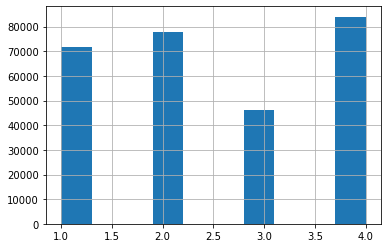

In [75]:
train1["city_class"].hist()

In [76]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train1, train1["city_class"]):
    strat_train_set = train1.loc[train_index]
    strat_test_set = train1.loc[test_index]

In [77]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("city_class", axis=1, inplace=True)

In [78]:
attr_ed = CombinedAttributesEditor()

In [79]:
housing_ed = attr_ed.transform(strat_train_set)

In [80]:
X_ed = housing_ed.drop(['per_square_meter_price'], axis=1)
Y = housing_ed['per_square_meter_price']

In [81]:
housing_ed_imp = imputer.fit_transform(X_ed)

In [82]:
housing_ed_imp_pd = pd.DataFrame(housing_ed_imp, columns=X_ed.columns, index=X_ed.index )

In [83]:
housing_ed_imp_pd

,floor,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,...,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,total_square,date,city_id,street_id,realty_type_10,realty_type_100,realty_type_110
0,1.0,45.071873,39.025180,1.0,19.0,41.0,57.0,0.0,0.0,1.0,...,7.417910,12.791667,11.537313,19.0,6.0,4123.0,19469.0,1.0,0.0,0.0
1,1.0,45.072517,39.038470,1.0,4.0,9.0,18.0,0.0,0.0,1.0,...,20.100000,6.452830,4.800000,87.0,4.0,4123.0,19469.0,1.0,0.0,0.0
2,1.0,45.073100,39.038513,0.0,4.0,8.0,17.0,0.0,0.0,1.0,...,21.125000,6.300000,4.500000,52.0,2.0,4123.0,19469.0,0.0,0.0,1.0
3,19.0,45.071530,39.030180,1.0,12.0,29.0,49.0,0.0,1.0,1.0,...,10.647059,11.363636,9.147059,51.0,6.0,4123.0,19469.0,0.0,1.0,0.0
4,1.0,45.073166,39.038456,0.0,4.0,8.0,17.0,0.0,0.0,1.0,...,21.125000,6.300000,4.500000,42.1,2.0,4123.0,19469.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223828,1.0,59.947440,30.643627,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,6.400000,30.800000,49.333333,120.0,6.0,4361.0,20579.0,1.0,0.0,0.0
223829,1.0,60.919620,36.763268,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,6.400000,44.000000,49.333333,87.0,1.0,399.0,1350.0,1.0,0.0,0.0
223830,1.0,56.019080,36.996574,0.0,0.0,2.0,3.0,0.0,0.0,0.0,...,1.800000,52.800000,53.000000,200.0,3.0,3941.0,15576.0,0.0,0.0,1.0
223831,1.0,55.626990,37.023975,3.0,13.0,14.0,15.0,1.0,1.0,1.0,...,11.250000,15.200000,17.000000,62.0,5.0,3481.0,11735.0,1.0,0.0,0.0


In [84]:
housing_prepared = StandardScaler().fit_transform(housing_ed_imp_pd)

In [85]:
housing_prepared_pd = pd.DataFrame(housing_prepared, columns=housing_ed_imp_pd.columns, index=housing_ed_imp_pd.index)

In [86]:
housing_prepared_pd[['realty_type_10','realty_type_100','realty_type_110']] = housing_ed_imp_pd[['realty_type_10','realty_type_100','realty_type_110']]

In [87]:
housing_prepared_pd

,floor,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,...,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,total_square,date,city_id,street_id,realty_type_10,realty_type_100,realty_type_110
0,-0.097010,-2.187865,-0.512158,-0.407078,-0.405951,-0.386283,-0.443119,-0.095726,-0.129428,-0.070140,...,0.040968,-0.911427,-0.800738,-0.286082,0.657064,0.373421,0.505004,1.0,0.0,0.0
1,-0.097010,-2.187713,-0.511379,-0.407078,-0.687780,-0.690858,-0.669802,-0.095726,-0.129428,-0.070140,...,3.227305,-1.054243,-0.932137,-0.246404,-0.214997,0.373421,0.505004,1.0,0.0,0.0
2,-0.097010,-2.187576,-0.511376,-0.645042,-0.687780,-0.700376,-0.675615,-0.095726,-0.129428,-0.070140,...,3.484834,-1.057686,-0.937988,-0.266826,-1.087057,0.373421,0.505004,0.0,0.0,1.0
3,5.280127,-2.187945,-0.511865,-0.407078,-0.537471,-0.500499,-0.489618,-0.095726,0.017503,-0.070140,...,0.852282,-0.943601,-0.847355,-0.267410,0.657064,0.373421,0.505004,0.0,1.0,0.0
4,-0.097010,-2.187560,-0.511380,-0.645042,-0.687780,-0.700376,-0.675615,-0.095726,-0.129428,-0.070140,...,3.484834,-1.057686,-0.937988,-0.272603,-1.087057,0.373421,0.505004,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223828,-0.097010,1.315380,-1.003351,-0.645042,-0.762934,-0.776520,-0.762801,-0.095726,-0.129428,-0.138195,...,-0.214779,-0.505693,-0.063592,-0.227149,0.657064,0.684496,0.703458,1.0,0.0,0.0
223829,-0.097010,1.544332,-0.644715,-0.645042,-0.762934,-0.776520,-0.762801,-0.095726,-0.129428,-0.138195,...,-0.214779,-0.208293,-0.063592,-0.246404,-1.523088,-4.493990,-2.734433,1.0,0.0,0.0
223830,-0.097010,0.390239,-0.631042,-0.645042,-0.762934,-0.757484,-0.756988,-0.095726,-0.129428,-0.138195,...,-1.370516,-0.010026,0.007920,-0.180470,-0.651027,0.135540,-0.191013,0.0,0.0,1.0
223831,-0.097010,0.297900,-0.629436,0.068849,-0.518683,-0.643268,-0.687240,2.500811,0.017503,-0.070140,...,1.003769,-0.857166,-0.694197,-0.260992,0.221034,-0.465698,-0.877733,1.0,0.0,0.0


In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3], 'max_features': [2, 4, 6, 8], 'min_samples_split': [10, 100, 1000], 'max_depth': [3, 5, 7, 9] }  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared_pd, Y)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\miron\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-40-26c2dde3e555>", line 12, in <module>
    grid_search.fit(housing_prepared_pd, Y)
  File "C:\Users\miron\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\miron\Anaconda\lib\site-packages\sklearn\model_selection\_search.py", line 736, in fit
    self._run_search(evaluate_candidates)
  File "C:\Users\miron\Anaconda\lib\site-packages\sklearn\model_selection\_search.py", line 1188, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "C:\Users\miron\Anaconda\lib\site-packages\sklearn\model_selection\_search.py", line 708, in evaluate_candidates
    out = parallel(delayed(_fit_and_score)(clone(base_estimator),
  File "C:\Users\miron\Anaconda\lib\site-packages\joblib\parallel.py", l

TypeError: object of type 'NoneType' has no len()

In [88]:
train1.iloc[:,0]  = train1.iloc[:,0].replace(tt)
train1.iloc[:,0]

0         4251
1         3923
2         4186
3         3638
4         4920
          ... 
279787    3935
279788    4858
279789    4440
279790    4018
279791    3742
Name: city, Length: 279792, dtype: int64